# Importing Necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,StandardScaler
from scipy import stats


In [23]:
url='https://raw.githubusercontent.com/ishworrsubedii/Machine_Learning_Algorithms_Journey/main/Linear%20Regression%20using%20scikitlearn/houses.txt'

In [24]:
dataset=pd.read_csv(url)

In [25]:
dataset.isnull().sum()

Size                  0
Number_of_Bedrooms    0
Number_of_floors      0
Age_of_Home           0
Price                 0
dtype: int64

In [26]:
dataset.duplicated().sum()

7

In [27]:
dataset=dataset.drop_duplicates()

In [28]:
dataset.duplicated().sum()

0

In [29]:
dataset.shape

(93, 5)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size                93 non-null     float64
 1   Number_of_Bedrooms  93 non-null     float64
 2   Number_of_floors    93 non-null     float64
 3   Age_of_Home         93 non-null     float64
 4   Price               93 non-null     float64
dtypes: float64(5)
memory usage: 4.4 KB


In [31]:
dataset.describe()

,Size,Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1415.645161,2.709677,1.376344,38.150538,364.656258
std,418.318156,0.652431,0.487094,24.912868,105.496898
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1096.000000,2.000000,1.000000,17.000000,288.304000
50%,1419.000000,3.000000,1.000000,25.000000,354.000000
75%,1656.000000,3.000000,2.000000,57.000000,426.980000
max,3194.000000,4.000000,2.000000,107.000000,718.200000


In [32]:
cor=dataset.corr()

<AxesSubplot: >

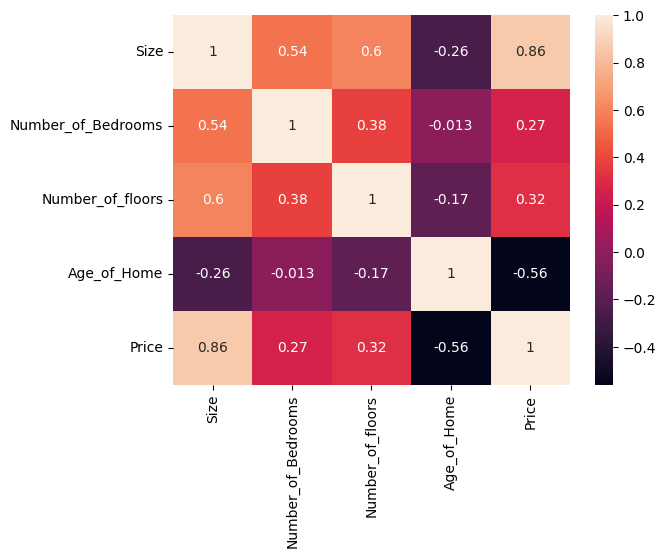

In [33]:
sns.heatmap(cor,annot=True)

***EDA Using Pandas Profiling***

In [34]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(dataset)
# profile.to_file(output_file='EDA.html')

# Feature Transformation

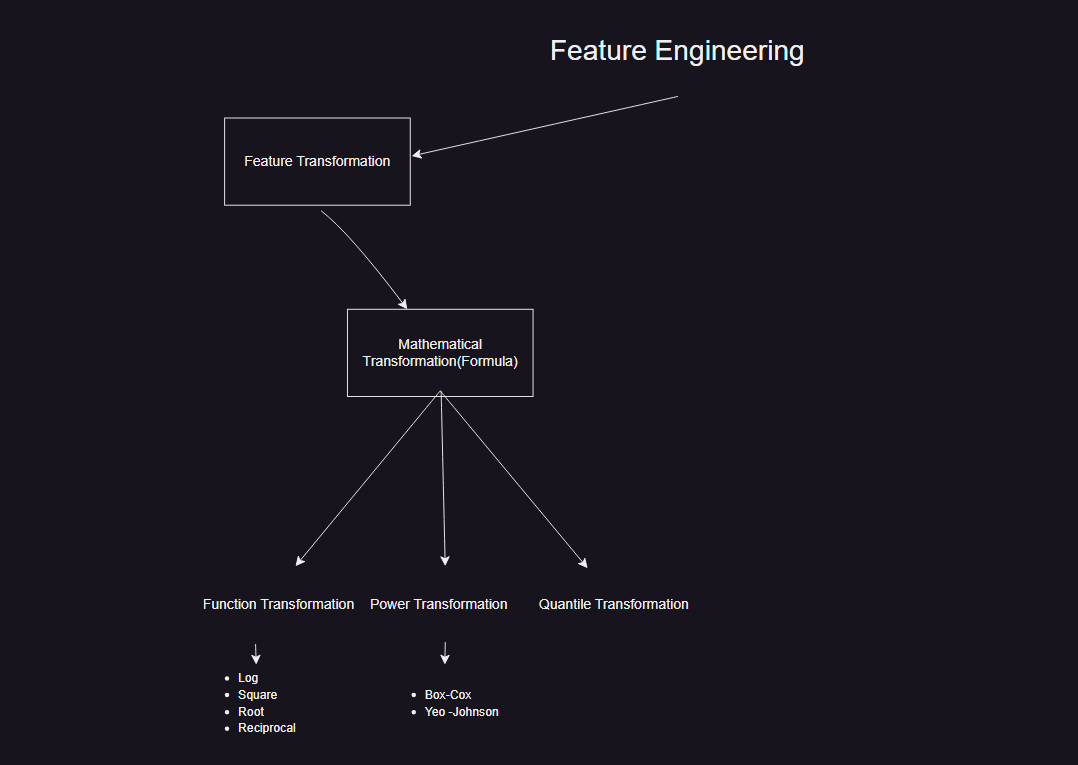

>- It is generally used to increase the model's performance because the above transformation will convert data into a normal distribution.
>- It is more effective for logistic and linear regression.

- First we have to find out if our data is in normal distribution or not.
To check that we can use 
> - Distplot
>- Pd.skwe() if =0-> normal
> - QQplot

In [35]:
dataset.sample(5)

,Size,Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price
61,1150.0,3.0,1.0,62.0,282.0
40,1775.0,3.0,2.0,28.0,426.0
91,1430.0,3.0,2.0,21.0,340.0
38,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [36]:
dataset.columns.value_counts().sum()

5

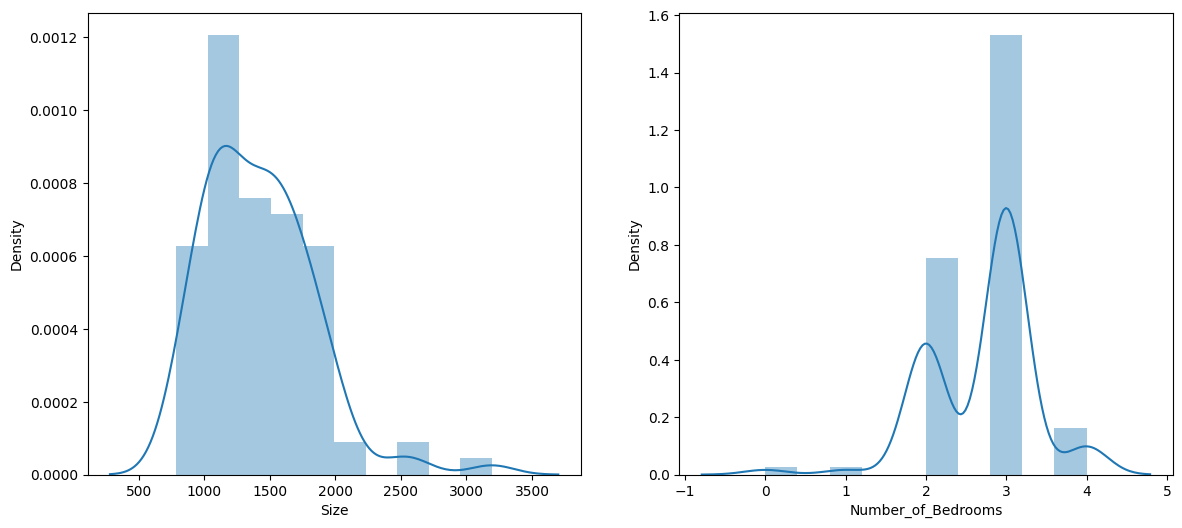

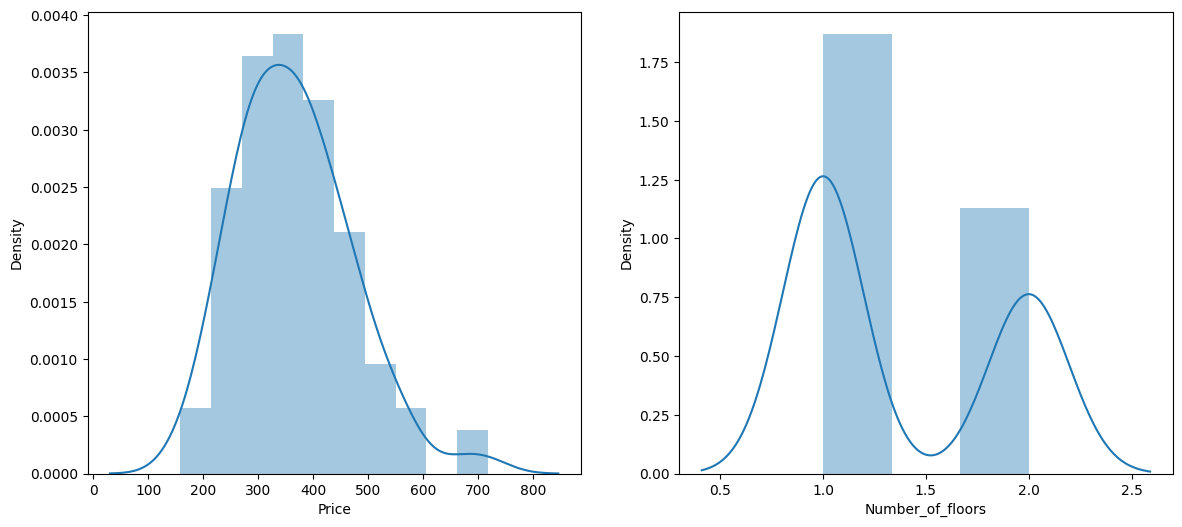

In [37]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.distplot(dataset.Size,ax=axes[0])
sns.distplot(dataset.Number_of_Bedrooms,ax=axes[1])


fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.distplot(dataset.Price,ax=axes[0])
sns.distplot(dataset.Number_of_floors,ax=axes[1])

warnings.simplefilter('ignore')
plt.show()

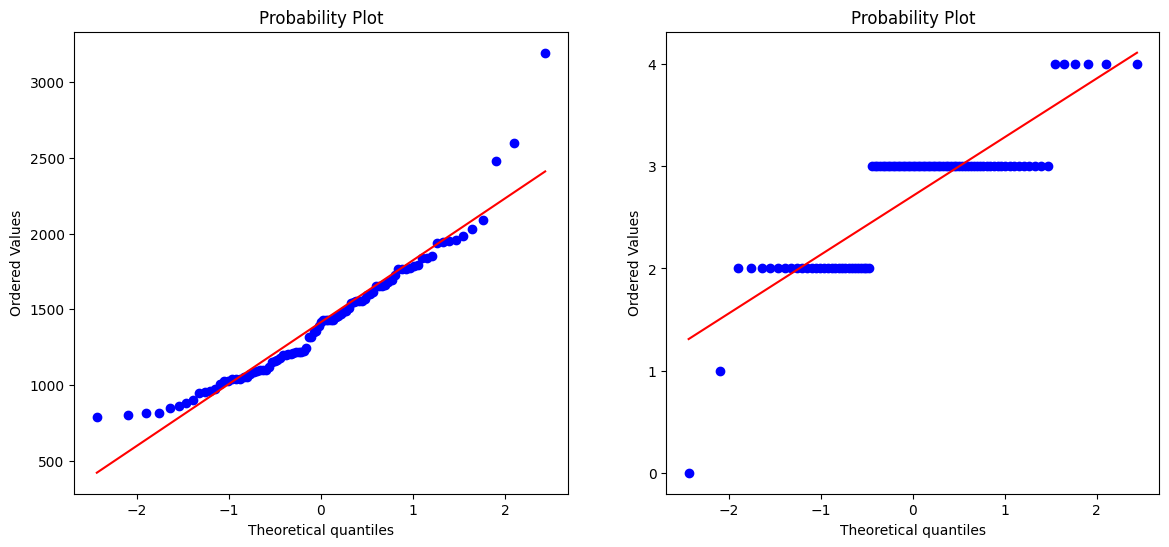

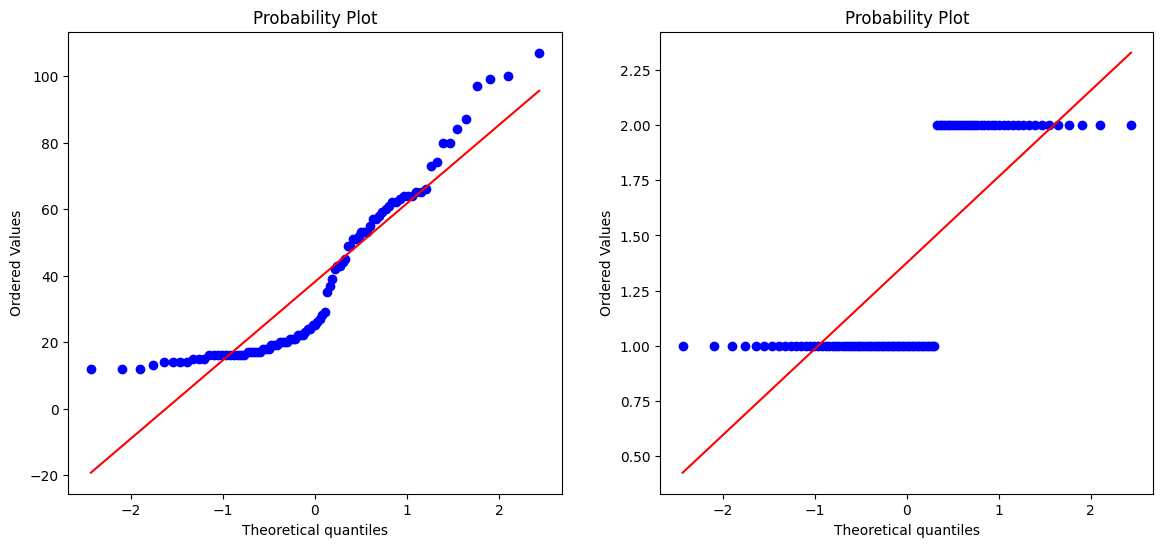

In [38]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(dataset.Size, plot=axes[0])
stats.probplot(dataset.Number_of_Bedrooms, plot=axes[1])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(dataset.Age_of_Home, plot=axes[0])
stats.probplot(dataset.Number_of_floors, plot=axes[1])

warnings.simplefilter('ignore')
plt.show()


# 1. Function Transformation

In [39]:
dataset.sample(10)

,Size,Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price
5,1314.0,2.0,1.0,14.0,415.0
83,1446.0,3.0,2.0,25.0,350.0
36,1840.0,3.0,2.0,20.0,460.0
69,1431.0,3.0,1.0,59.0,330.0
41,2030.0,4.0,2.0,45.0,390.0
30,1419.0,3.0,2.0,19.0,368.2
90,803.0,2.0,1.0,80.0,174.0
45,1953.0,3.0,2.0,16.0,504.0
58,1654.0,3.0,1.0,19.0,460.0
76,1547.0,3.0,2.0,12.0,430.4


In [40]:
x=dataset.iloc[:,0:3]

In [41]:
y=dataset.iloc[:,4]

## Without any Transformer

In [42]:
lr=LinearRegression()
lr.fit(x,y)
without_transformer_model_prediction=lr.predict(x)

In [43]:
mean_squared_error(y,without_transformer_model_prediction),r2_score(y,without_transformer_model_prediction)

(1582.2822586336931, 0.8562857935138632)

## Using Transformation

***Log***

In [44]:
trf1=FunctionTransformer(func=np.log1p)

In [45]:
x_train=trf1.fit_transform(x)

In [46]:
lr=LinearRegression()
lr.fit(x_train,y)
log_transformed=lr.predict(x_train)

In [47]:
mean_squared_error(y,log_transformed),r2_score(y,log_transformed)

(1718.6503540906913, 0.8438998664634323)

***Squared***

In [48]:
trf2=FunctionTransformer(func=np.square)

In [49]:
x_train2=trf2.fit_transform(x)
lr2=LinearRegression()
lr2.fit(x_train2,y)
square_transformed=lr2.predict(x_train2)



In [50]:
mean_squared_error(y,square_transformed),r2_score(y,square_transformed)

(2703.851624870869, 0.7544168313812036)

***Square Root***

In [51]:
trf3=FunctionTransformer(func=np.sqrt)

In [52]:
x_train3=trf3.fit_transform(x)
lr3=LinearRegression()
lr3.fit(x_train3,y)
squareroot_transformed=lr3.predict(x_train3)



In [53]:
mean_squared_error(y,squareroot_transformed),r2_score(y,squareroot_transformed)

(1536.1738419785763, 0.8604736901269772)

In [54]:
X_train=pd.DataFrame(x_train3)

- Here Square Root performed littlebit well for datasets so we will use squar root transformation

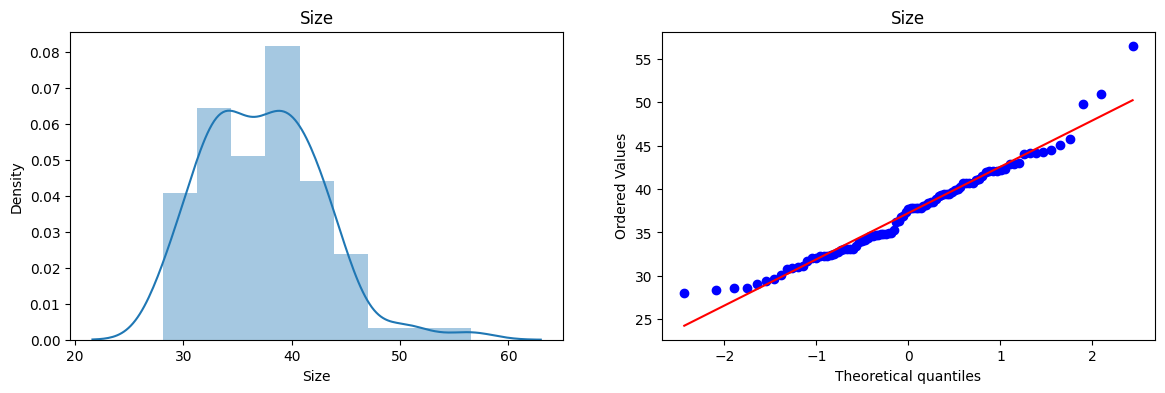

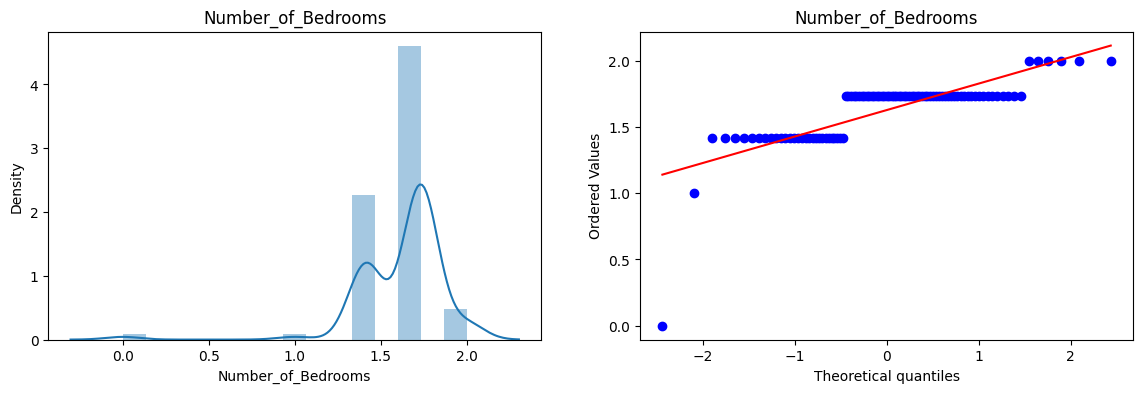

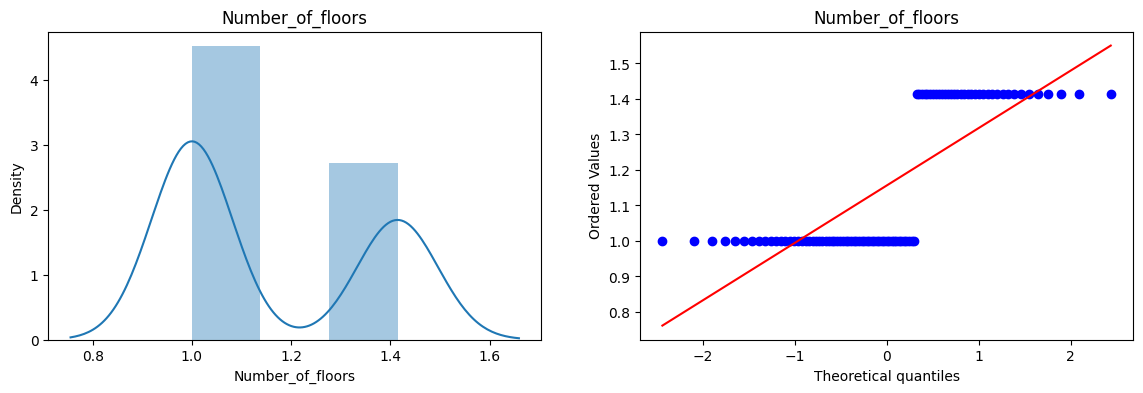

In [55]:

for columns in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[columns])
    plt.title(columns)

    plt.subplot(122)
    stats.probplot(X_train[columns], dist="norm", plot=plt)
    plt.title(columns)

    plt.show()

# 2. Power Transformer

In [56]:
house_dataset=pd.read_csv('C:/Users/ACER/Desktop/Machine_Learning/Day-9/Datasets/kc_house_data.csv')

- Simple Data preprocessing

In [57]:
house_dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
house_dataset.columns.value_counts().sum()

21

In [59]:
house_dataset=house_dataset[['bedrooms','bathrooms','sqft_living','yr_built','yr_renovated','sqft_lot','price']]
x_=house_dataset[['bedrooms','bathrooms','sqft_living','yr_built','yr_renovated','sqft_lot']]
y=house_dataset['price']

In [60]:
x_.sample(3)

,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,sqft_lot
8026,2,1.0,810,1944,0,6827
13062,3,1.0,1020,1944,0,4800
3080,4,2.0,1640,1963,0,7200


In [61]:
y.sample(3)

4668     414000.0
8655     760000.0
12685    312500.0
Name: price, dtype: float64

In [62]:
house_dataset.columns.value_counts().sum()


7

In [63]:
corr=house_dataset.corr()

<AxesSubplot: >

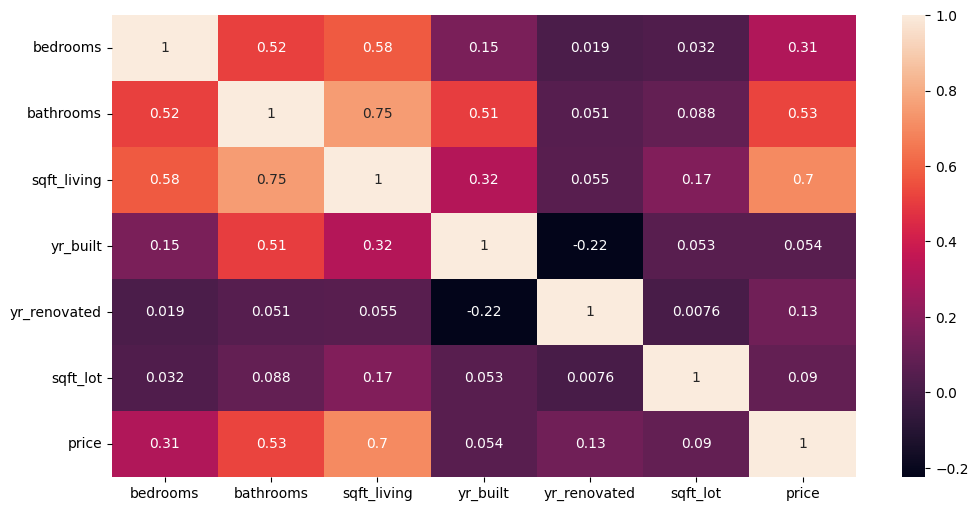

In [64]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
sns.heatmap(corr,annot=True)

We can remove sqft_lot and yr_buit because there is no big correlation between price .

In [65]:
x_house_price=x_[['bedrooms','bathrooms','sqft_living','yr_renovated']]
y_house_price=y

In [66]:
x_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21613 non-null  int64  
 1   bathrooms     21613 non-null  float64
 2   sqft_living   21613 non-null  int64  
 3   yr_renovated  21613 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 675.5 KB


In [67]:
x_house_price.describe()

,bedrooms,bathrooms,sqft_living,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,84.402258
std,0.930062,0.770163,918.440897,401.679240
min,0.000000,0.000000,290.000000,0.000000
25%,3.000000,1.750000,1427.000000,0.000000
50%,3.000000,2.250000,1910.000000,0.000000
75%,4.000000,2.500000,2550.000000,0.000000
max,33.000000,8.000000,13540.000000,2015.000000


In [68]:
x_house_price.sample(4)

,bedrooms,bathrooms,sqft_living,yr_renovated
3871,5,4.75,6240,0
21127,3,2.25,1110,0
19434,6,3.50,3830,0
10036,4,2.50,2520,0


In [69]:
y_house_price.sample(4)

17167    642000.0
19374    330000.0
3108      89950.0
15695    610000.0
Name: price, dtype: float64

In [70]:
lr4=LinearRegression()
lr4.fit(x_house_price,y_house_price)
without_transformation=lr4.predict(x_house_price)

In [95]:
mean_squared_error(y_house_price,without_transformation),r2_score(y_house_price,without_transformation)

(65466656597.09441, 0.5142563400611069)

In [72]:
x_house_price_dataframe=pd.DataFrame(x_house_price)

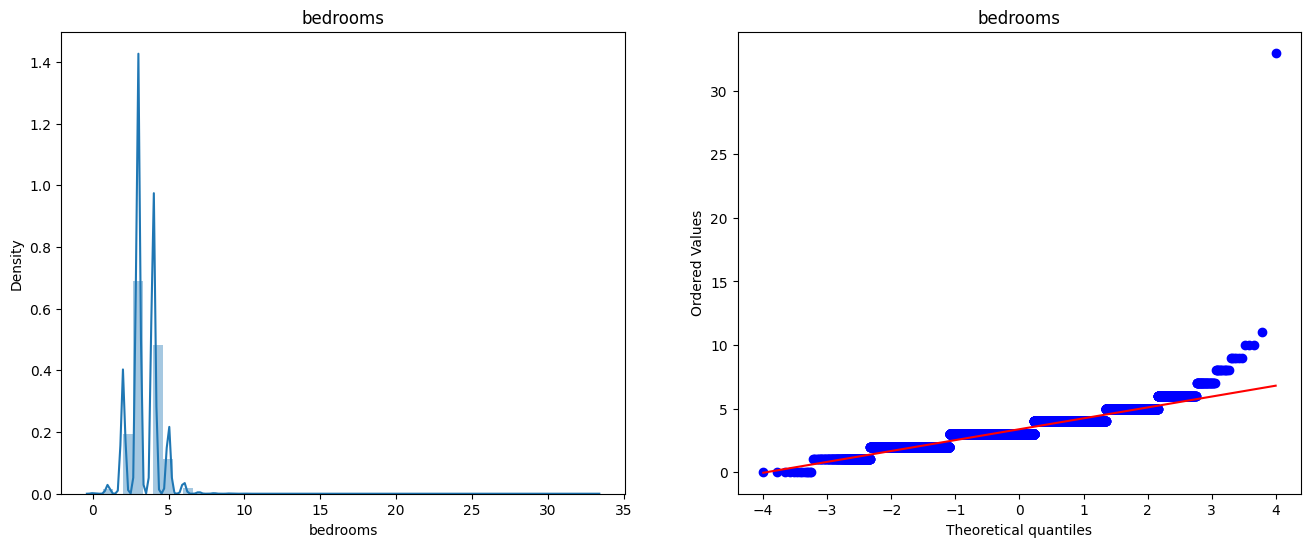

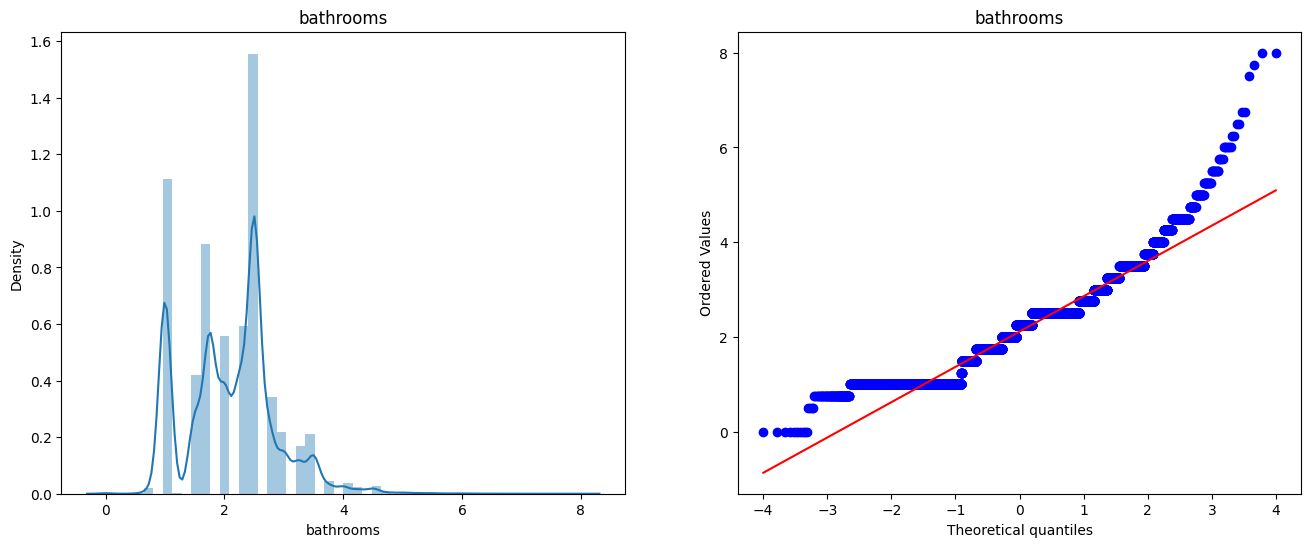

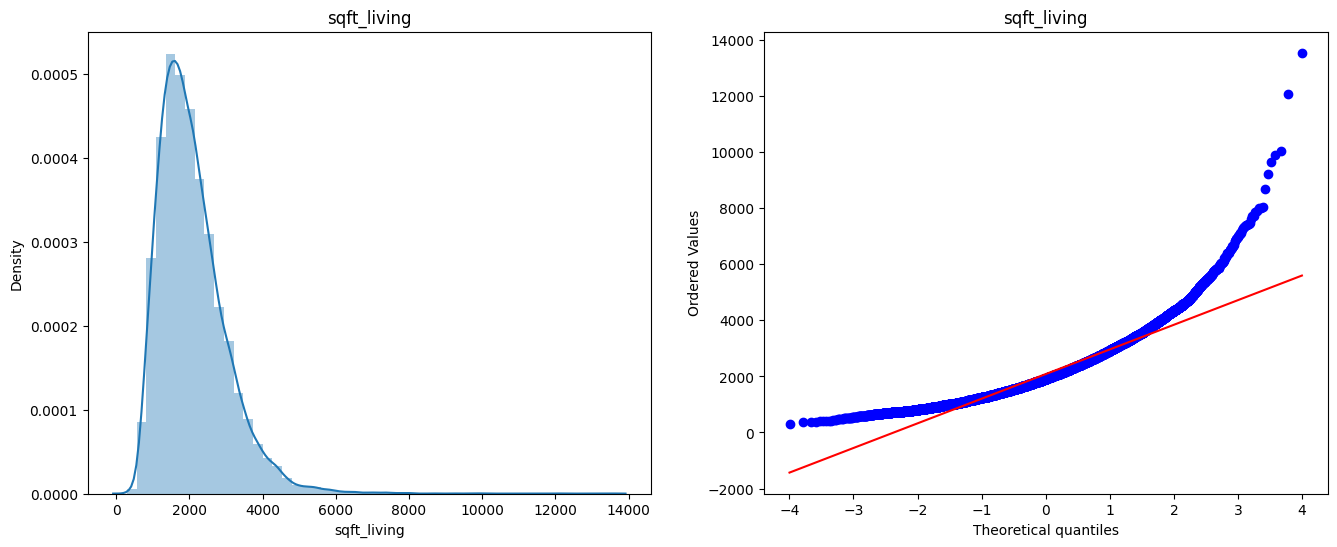

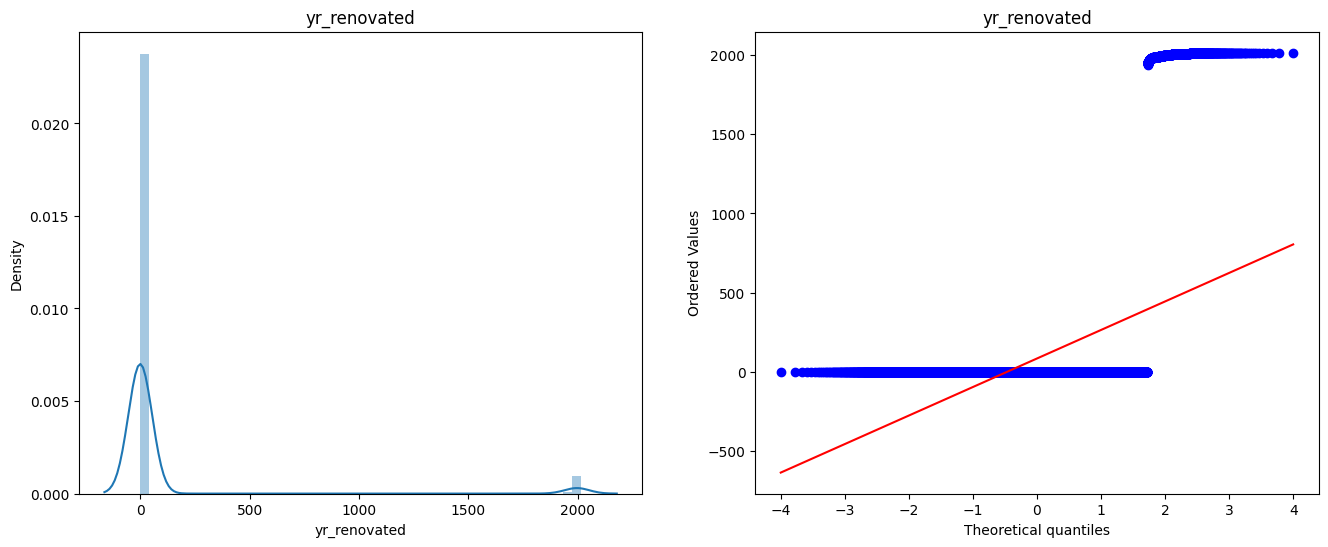

In [73]:
# Without Transformation
columns_title=['bedrooms','bathrooms','sqft_living','yr_renovated']
for i,columns  in enumerate( x_house_price_dataframe.columns):
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.distplot(x_house_price_dataframe[columns])
    plt.title(columns_title[i])

    plt.subplot(122)
    stats.probplot(x_house_price_dataframe[columns], dist="norm", plot=plt)
    plt.title(columns_title[i])

    plt.show()

***Box-Cox***

In [74]:
x_house_price.shape

(21613, 4)

In [75]:
y_house_price.shape


(21613,)

In [76]:
trf5=PowerTransformer(method='box-cox')
x_train_transformed_box_cox=trf5.fit_transform(x_house_price+0.000000001)

In [77]:
x_train_transformed_box_cox_dataframe=pd.DataFrame(x_train_transformed_box_cox)

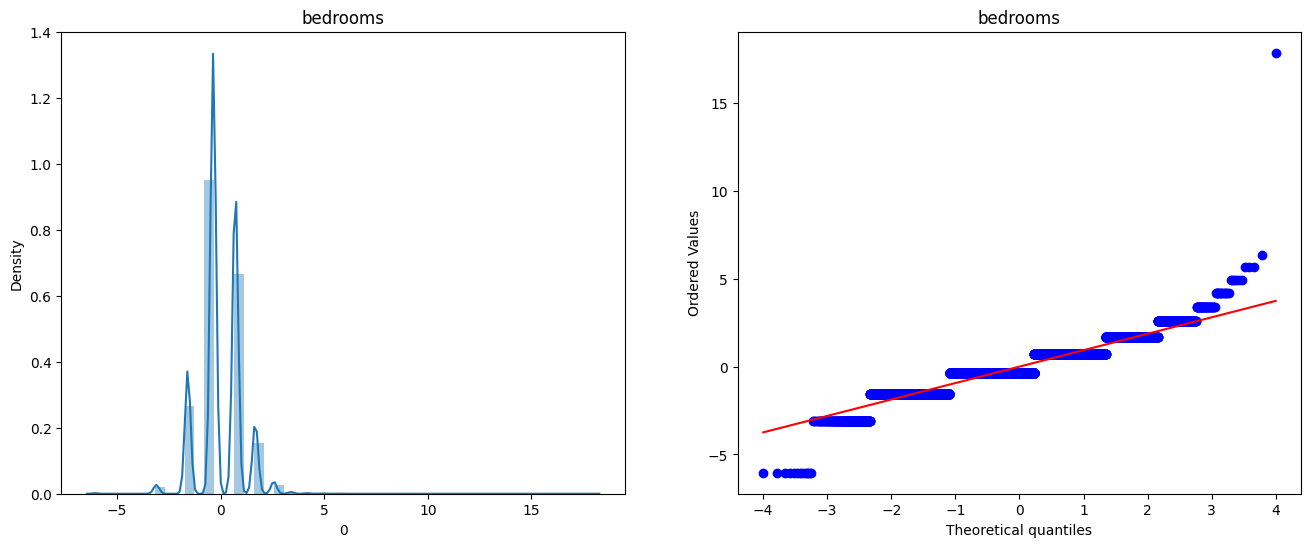

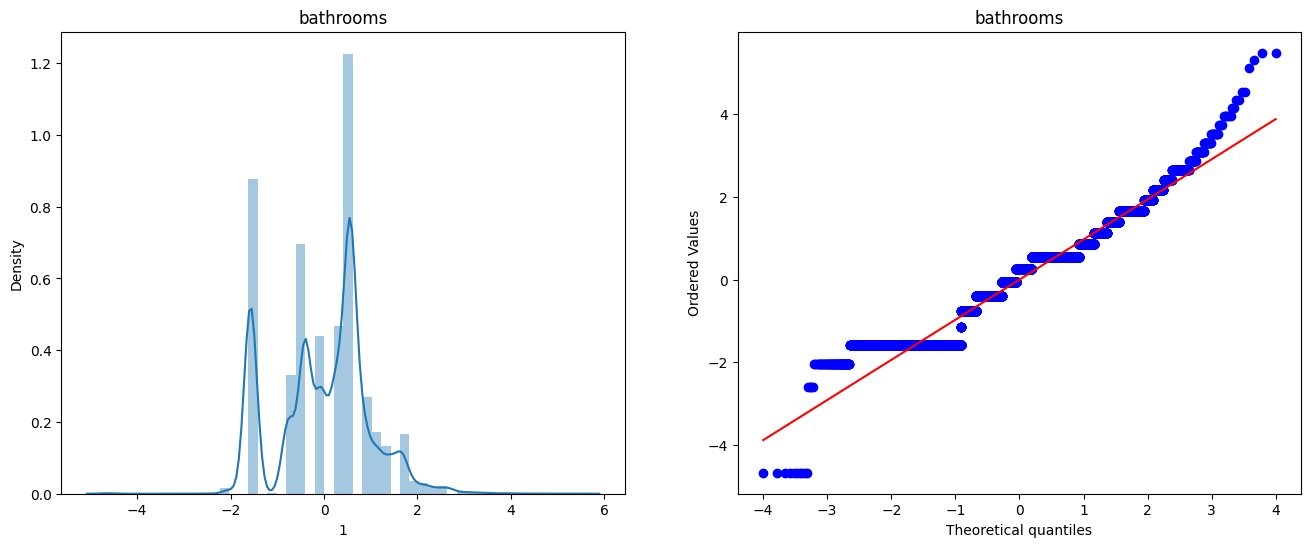

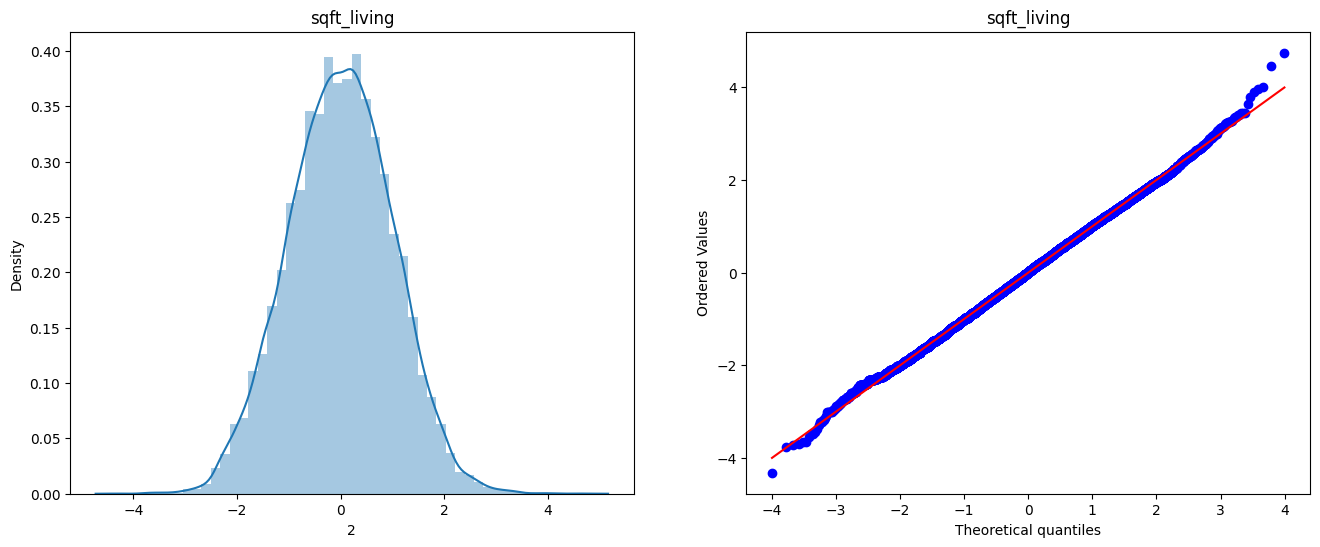

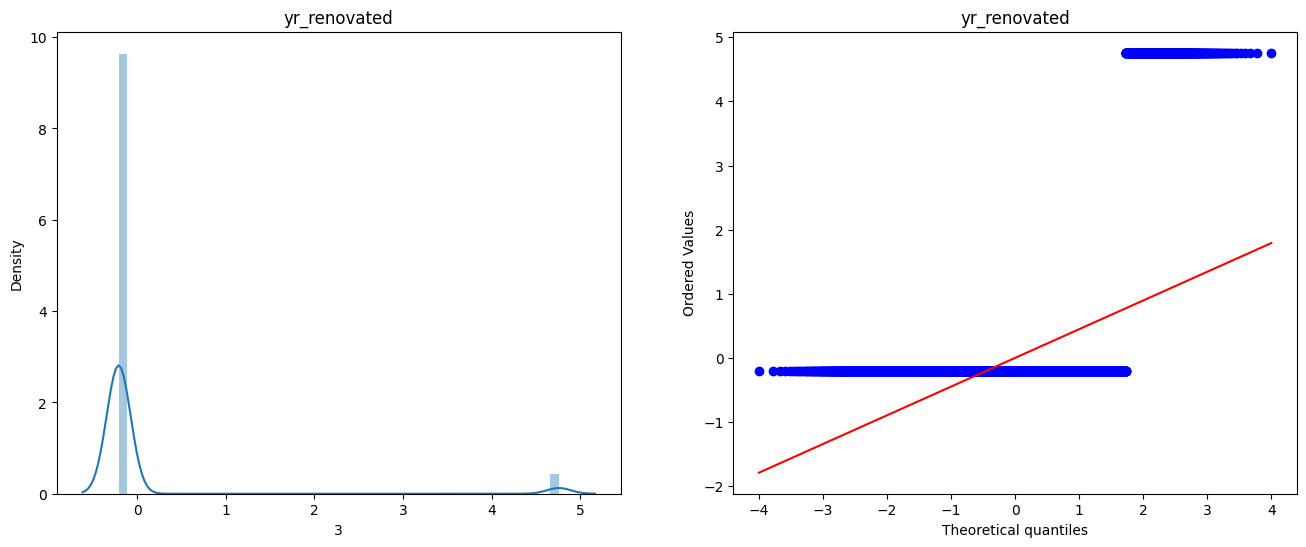

In [78]:
#Using Box-Cox Transformation
columns_title=['bedrooms','bathrooms','sqft_living','yr_renovated']
for i,columns  in enumerate( x_train_transformed_box_cox_dataframe.columns):
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.distplot(x_train_transformed_box_cox_dataframe[columns])
    plt.title(columns_title[i])

    plt.subplot(122)
    stats.probplot(x_train_transformed_box_cox_dataframe[columns], dist="norm", plot=plt)
    plt.title(columns_title[i])

    plt.show()

In [79]:
lr5=LinearRegression()
lr5.fit(x_train_transformed_box_cox,y_house_price)

LinearRegression()

In [82]:
x_train_transformed_box_cox.shape

(21613, 4)

In [84]:
y_box_cox_pred=lr5.predict(x_train_transformed_box_cox)

In [85]:
mean_squared_error(y_house_price,y_box_cox_pred),r2_score(y_house_price,y_box_cox_pred)

(80786891313.4481, 0.40058462885637103)

***Yeo-Johnson***

In [96]:
ss=StandardScaler()
x_house_price=ss.fit_transform(x_house_price)

In [97]:
house_dataset_after_standard_scaler=pd.DataFrame(x_house_price)

In [98]:
trf6=PowerTransformer(method='yeo-johnson',standardize=True)
x_train_transformed_yeo_johnson=trf6.fit_transform(x_house_price+0.0000001)

In [99]:
x_train_transformed_yeo_johnson_dataframe=pd.DataFrame(x_train_transformed_yeo_johnson)

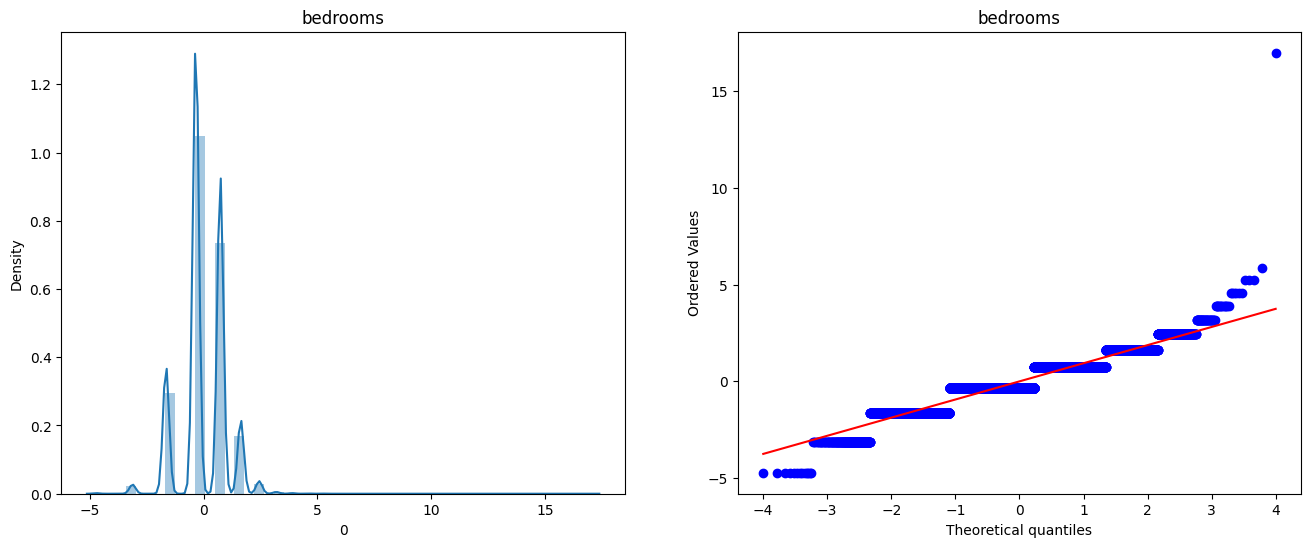

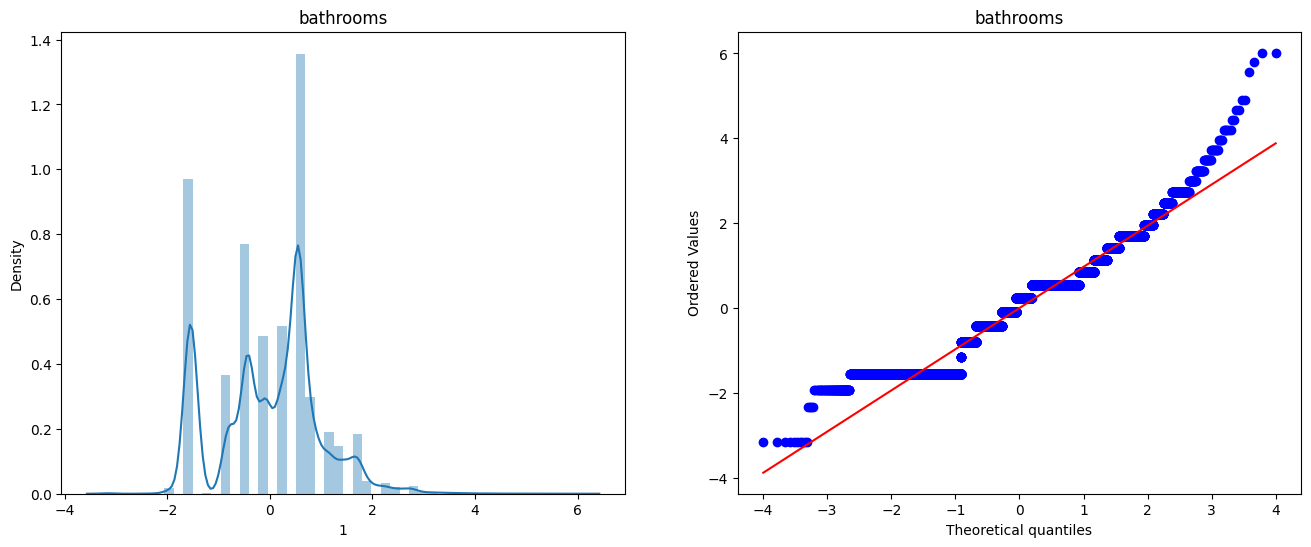

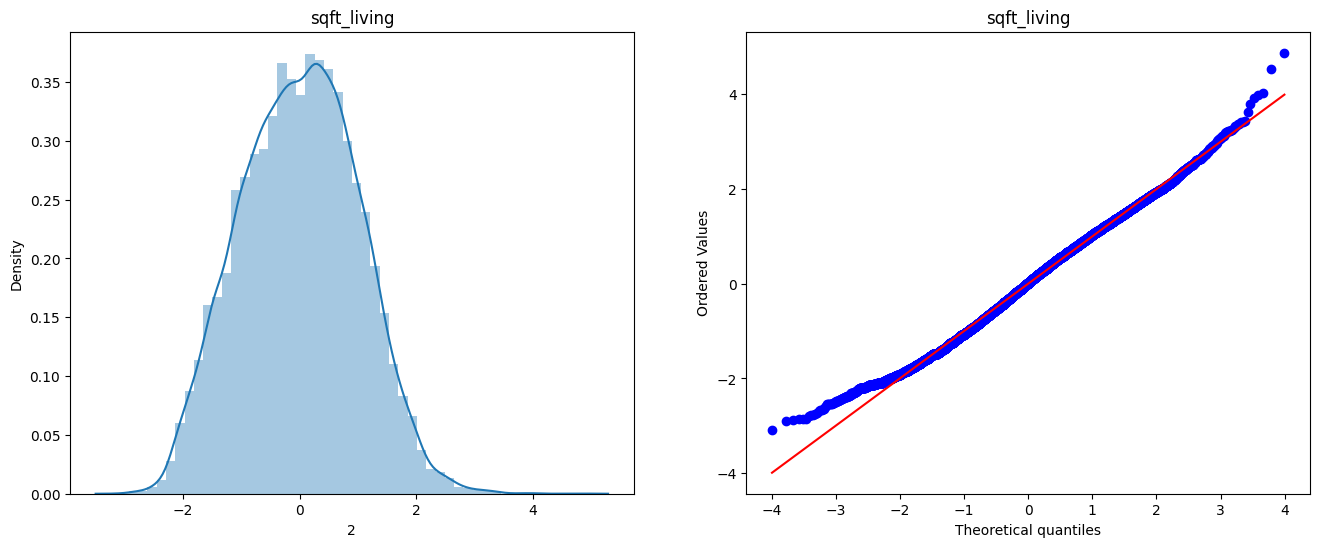

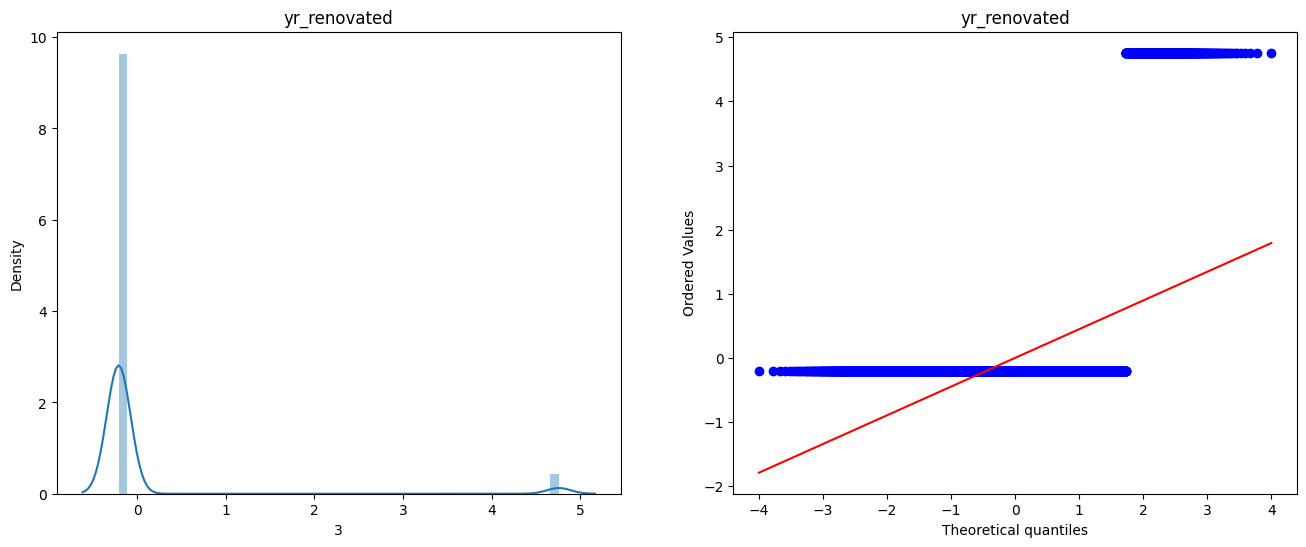

In [100]:
#Using Yeo-Johnson Transformation
columns_title=['bedrooms','bathrooms','sqft_living','yr_renovated']
for i,columns  in enumerate( x_train_transformed_yeo_johnson_dataframe.columns):
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.distplot(x_train_transformed_yeo_johnson_dataframe[columns])
    plt.title(columns_title[i])

    plt.subplot(122)
    stats.probplot(x_train_transformed_yeo_johnson_dataframe[columns], dist="norm", plot=plt)
    plt.title(columns_title[i])

    plt.show()

In [101]:
lr6=LinearRegression()
lr6.fit(x_train_transformed_yeo_johnson,y_house_price)

LinearRegression()

In [102]:
y_yeo_johnson=lr6.predict(x_train_transformed_yeo_johnson)

In [103]:
mean_squared_error(y_house_price,y_yeo_johnson),r2_score(y_house_price,y_yeo_johnson)

(80638305919.96745, 0.40168708950724763)

In [106]:
house_dataset_after_standard_scaler.sample(5)

,0,1,2,3
18929,0.676485,0.500221,1.404696,-0.210128
10090,0.676485,0.500221,-0.021667,-0.210128
8372,1.751707,-0.149007,-0.261209,4.664521
3798,0.676485,0.500221,0.675182,-0.210128
6785,0.676485,0.500221,0.272316,-0.210128


And last, this is not a perfect transformation for data; I have just shown you how you can implement the transformation in data using different mathematical functions.